In [1]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [16]:
seed_val = 23
np.random.seed(seed_val)

liwc_filepath = "/data/LIWC2007/Dictionaries/LIWC2007_English100131.dic"

'''
    result: a dictionary that maps each word to the LIWC cluster ids
        that it belongs to
    class_id: a dict that maps LIWC cluster to category id,
        this does not seem useful, here for legacy reasons
    cluster_result: a dict that maps LIWC cluster id to all words
        in that cluster
    categories: a dict that maps LIWC cluster to its name
    category_reverse: a dict that maps LIWC cluster name to its id
'''

preloadflag = True
saves_dir = os.path.join("../saves", "liwc")
Path(saves_dir).mkdir(parents=True, exist_ok=True)
plot_save_prefix = "liwc_dist"
plot_data = {}
analysis_types = [
    "sent_level", 
    "review_level", 
    "word_level"
]
required_categories = [
    "posemo", 
    "negemo", 
    "anger", 
    "sad", 
]

amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']

if not preloadflag:
    result, class_id, cluster_result, categories, category_reverse = liwc_util.load_liwc(liwc_filepath)            
    datasets = json.loads(open("input.json", "r").read())
    plot_data = {}
    for a_type in analysis_types:
        plot_data[a_type] = []
    for data in datasets:
        myprint(data)
        plot_data = compute_liwc(plot_data, data["positive"], data["name"], "positive", required_categories, result, class_id, 
            cluster_result, categories, category_reverse, analysis_types)
        plot_data = compute_liwc(plot_data, data["negative"], data["name"], "negative", required_categories, result, class_id, 
            cluster_result, categories, category_reverse, analysis_types)

        pickle_save_dir = os.path.join(saves_dir, "all")
        Path(pickle_save_dir).mkdir(parents=True, exist_ok=True)
        pickle.dump(plot_data, open(os.path.join(pickle_save_dir, "liwc_dist_data.pickle"), "wb"))
else:
    pickle_save_dir = os.path.join(saves_dir, "all")
    Path(pickle_save_dir).mkdir(parents=True, exist_ok=True)
    plot_data = pickle.load(open(os.path.join(pickle_save_dir, "liwc_dist_data.pickle"), "rb"))  

../saves/liwc/liwc_dist_posemo_negemo_word_level_amz


/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


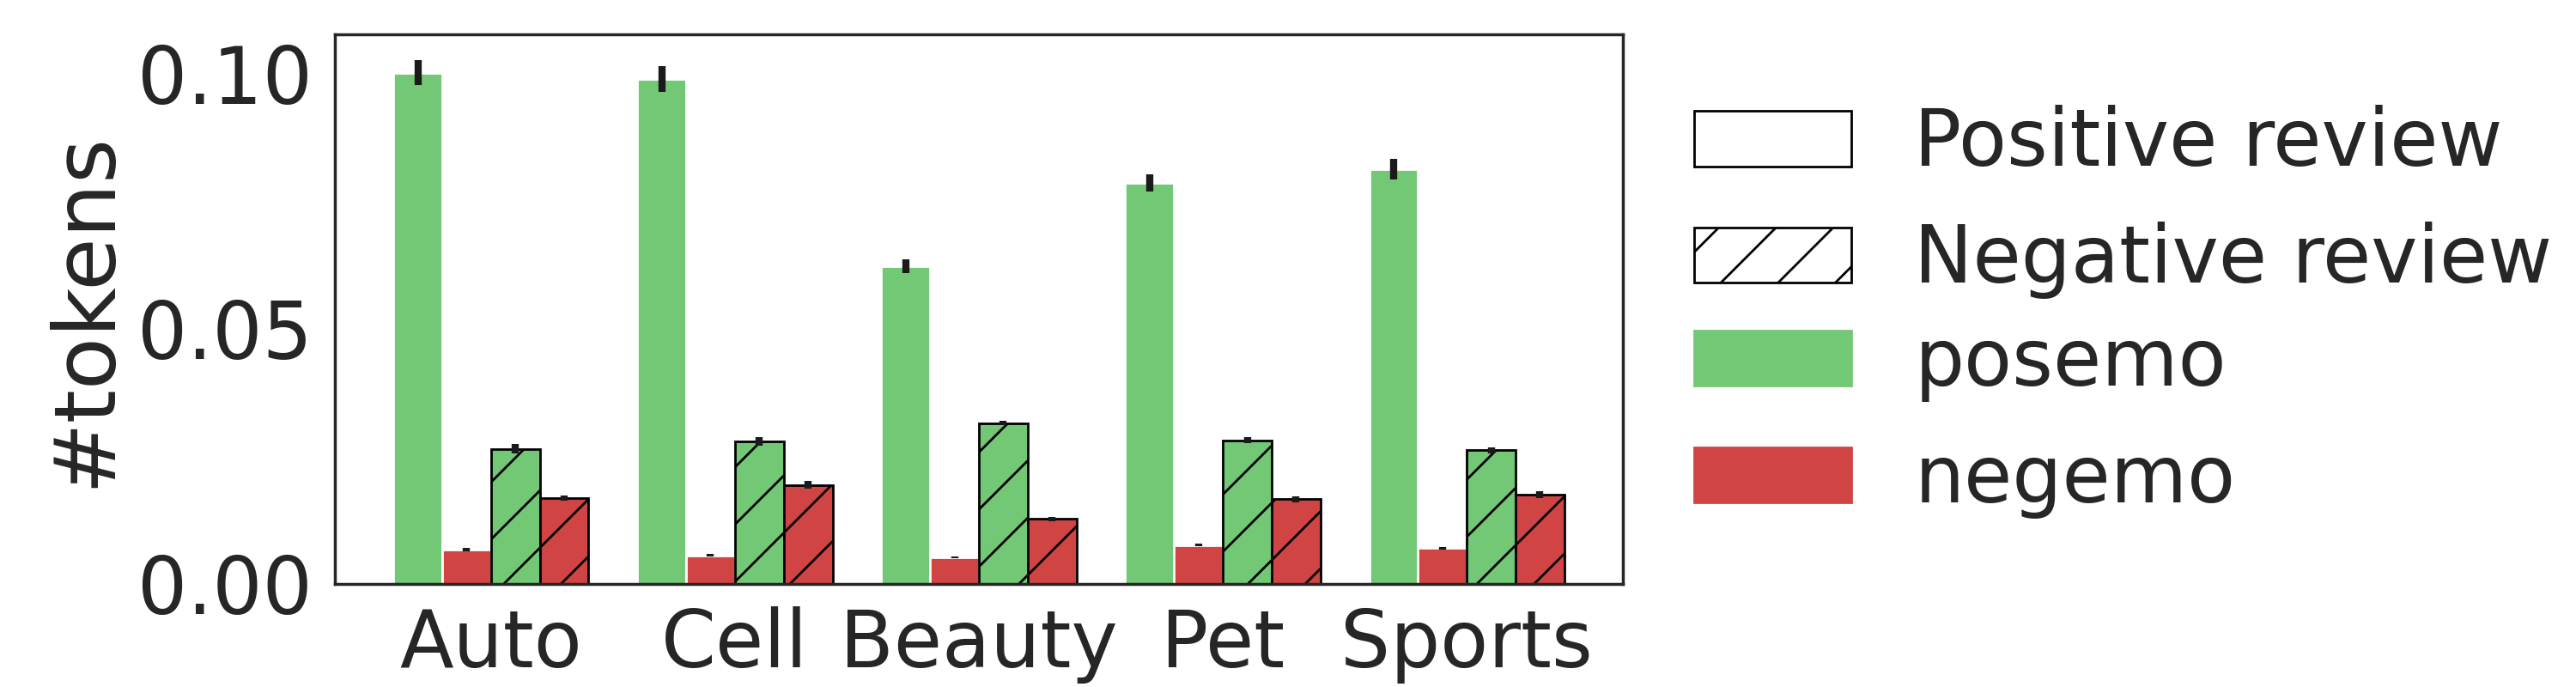

             name     value  sem_value liwc_category review category  \
8   Automotive     0.100163  0.002402   posemo        positive         
9   Automotive     0.006711  0.000290   negemo        positive         
10  Automotive     0.026472  0.000897   posemo        negative         
11  Automotive     0.016809  0.000558   negemo        negative         
0   Cellphones     0.098967  0.002465   posemo        positive         
1   Cellphones     0.005572  0.000270   negemo        positive         
2   Cellphones     0.027878  0.000869   posemo        negative         
3   Cellphones     0.019405  0.000779   negemo        negative         
12  Luxury Beauty  0.062208  0.001361   posemo        positive         
13  Luxury Beauty  0.005245  0.000169   negemo        positive         
14  Luxury Beauty  0.031549  0.000466   posemo        negative         
15  Luxury Beauty  0.012763  0.000397   negemo        negative         
4   Pet Supplies   0.078601  0.001659   posemo        positive  

<IPython.core.display.Javascript object>


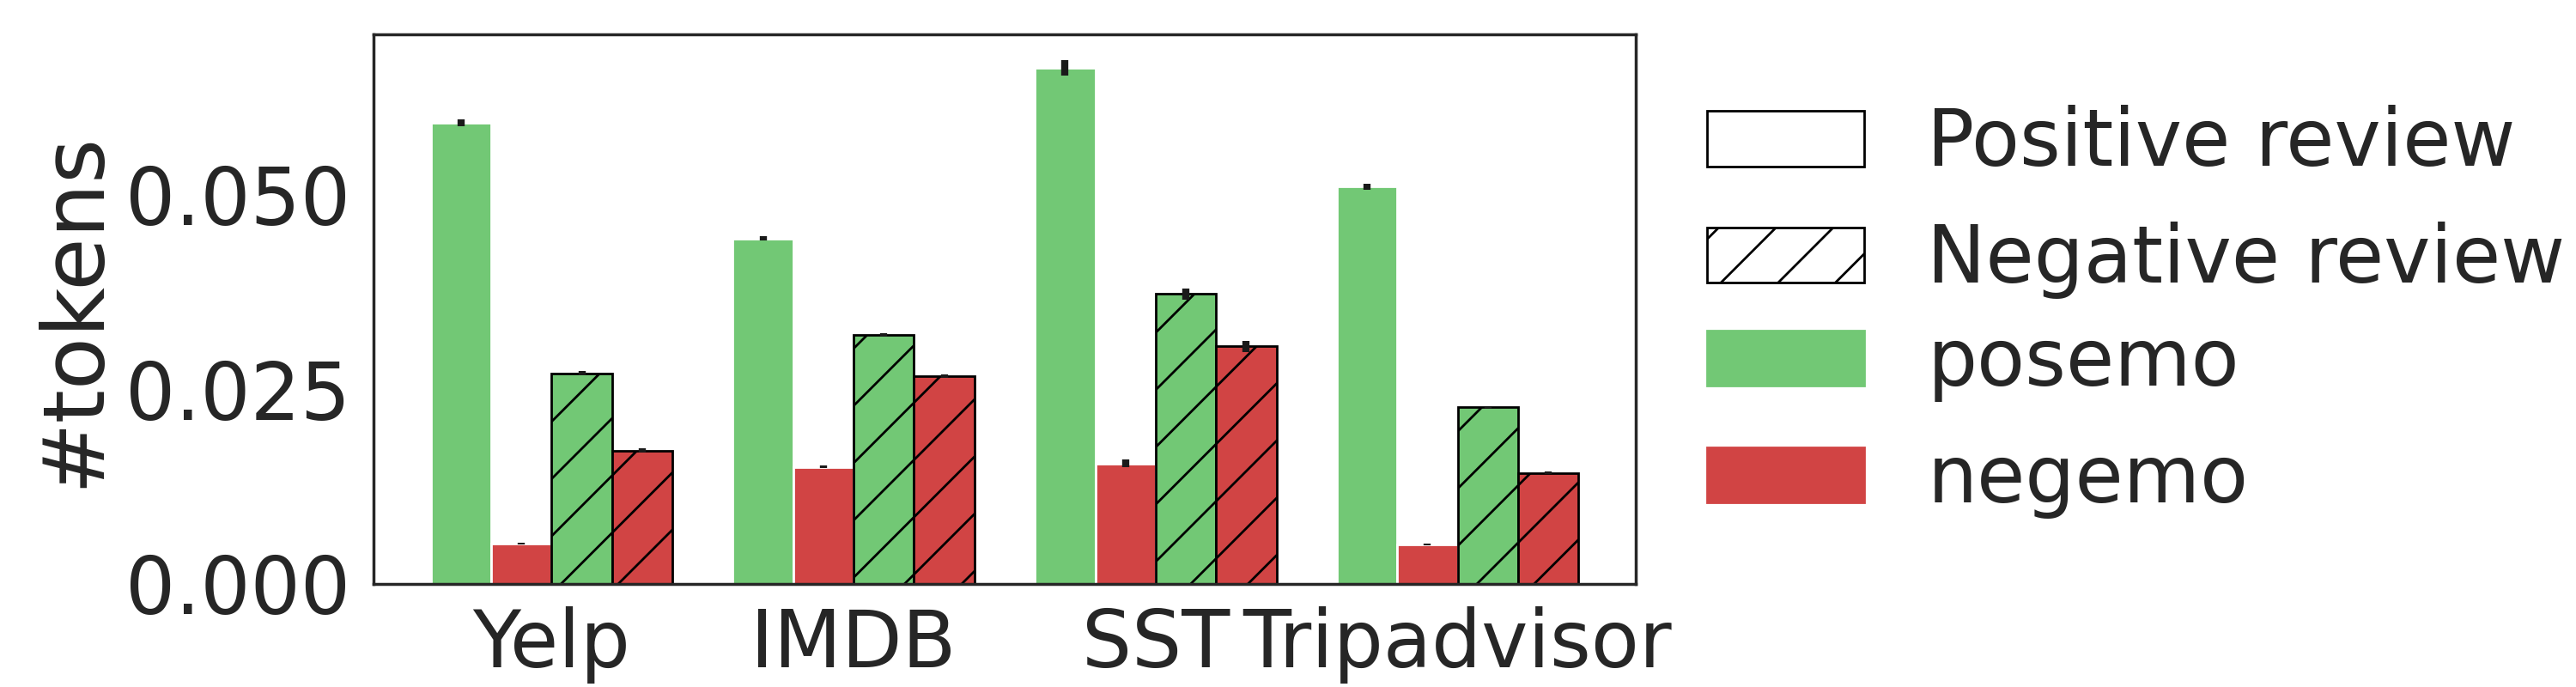

           name     value  sem_value liwc_category review category  \
8   IMDB         0.044357  0.000302   posemo        positive         
9   IMDB         0.015015  0.000167   negemo        positive         
10  IMDB         0.031968  0.000217   posemo        negative         
11  IMDB         0.026680  0.000214   negemo        negative         
0   SST          0.066206  0.000982   posemo        positive         
1   SST          0.015486  0.000468   negemo        positive         
2   SST          0.037246  0.000719   posemo        negative         
3   SST          0.030496  0.000721   negemo        negative         
12  Tripadvisor  0.051013  0.000403   posemo        positive         
13  Tripadvisor  0.005038  0.000104   negemo        positive         
14  Tripadvisor  0.022653  0.000208   posemo        negative         
15  Tripadvisor  0.014233  0.000176   negemo        negative         
4   Yelp         0.059177  0.000471   posemo        positive         
5   Yelp         0.0

<IPython.core.display.Javascript object>


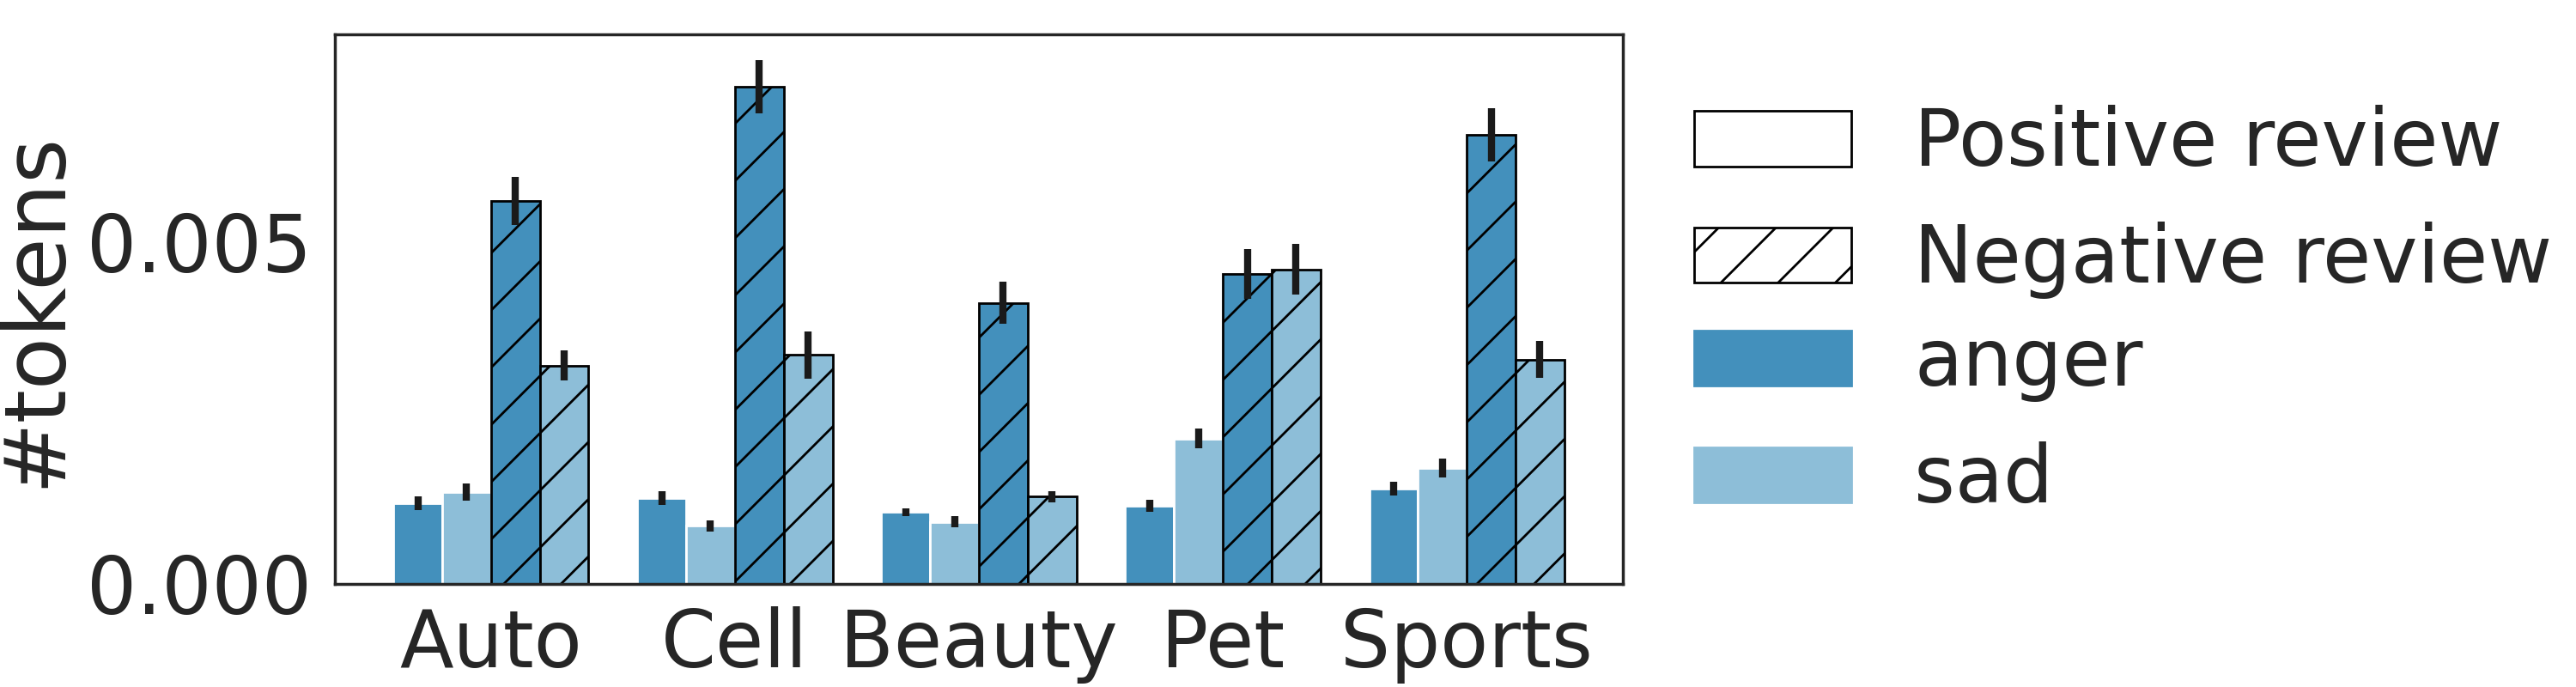

             name     value  sem_value liwc_category review category  \
9   Automotive     0.001175  0.000100   sad           positive         
8   Automotive     0.001348  0.000126   anger         positive         
11  Automotive     0.005595  0.000348   sad           negative         
10  Automotive     0.003190  0.000219   anger         negative         
1   Cellphones     0.001254  0.000097   sad           positive         
0   Cellphones     0.000847  0.000078   anger         positive         
3   Cellphones     0.007264  0.000384   sad           negative         
2   Cellphones     0.003349  0.000345   anger         negative         
13  Luxury Beauty  0.001050  0.000058   sad           positive         
12  Luxury Beauty  0.000907  0.000085   anger         positive         
15  Luxury Beauty  0.004108  0.000309   sad           negative         
14  Luxury Beauty  0.001276  0.000079   anger         negative         
5   Pet Supplies   0.001145  0.000091   sad           positive  

<IPython.core.display.Javascript object>


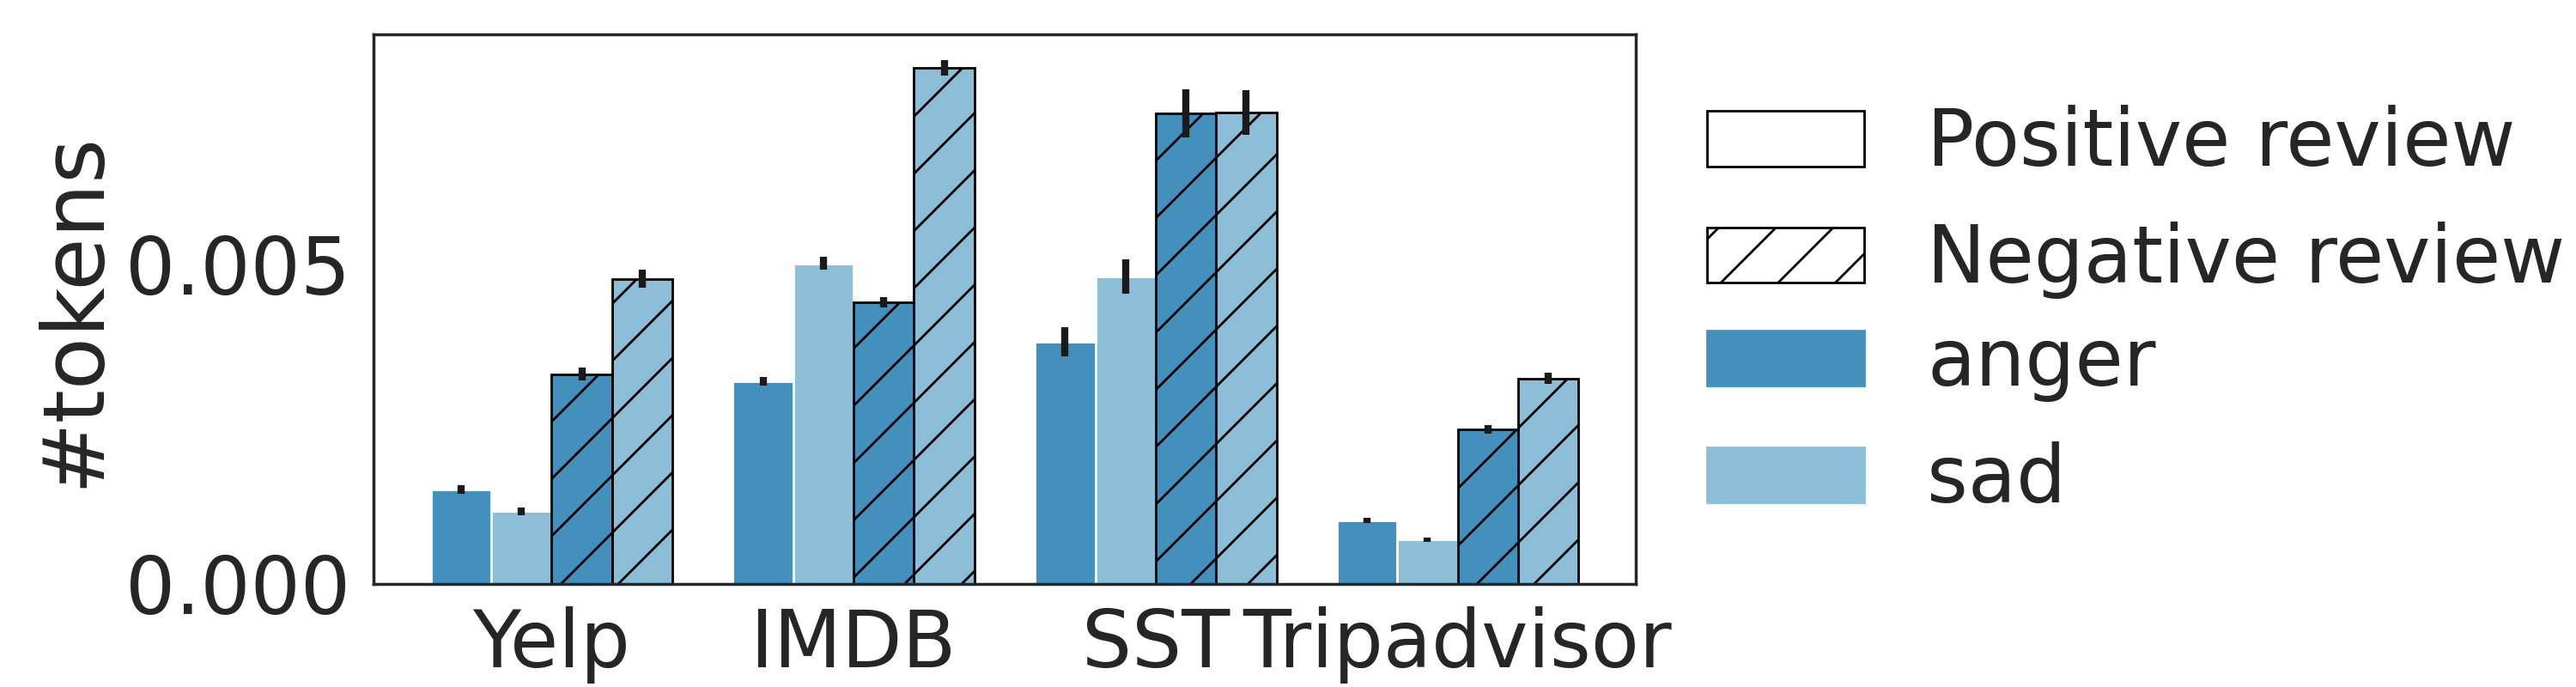

           name     value  sem_value liwc_category review category  \
9   IMDB         0.003168  0.000068   sad           positive         
8   IMDB         0.005017  0.000099   anger         positive         
11  IMDB         0.004404  0.000079   sad           negative         
10  IMDB         0.008071  0.000121   anger         negative         
1   SST          0.003793  0.000231   sad           positive         
0   SST          0.004816  0.000269   anger         positive         
3   SST          0.007368  0.000379   sad           negative         
2   SST          0.007380  0.000352   anger         negative         
13  Tripadvisor  0.000992  0.000042   sad           positive         
12  Tripadvisor  0.000697  0.000035   anger         positive         
15  Tripadvisor  0.002422  0.000064   sad           negative         
14  Tripadvisor  0.003216  0.000086   anger         negative         
5   Yelp         0.001479  0.000069   sad           positive         
4   Yelp         0.0

In [31]:
reload(seaborn_plot_util)

plot_categories = [
    ["posemo","negemo"], 
    ["anger", "sad"]
]
for analysis in analysis_types[2:]:
    plot_data_df = pd.DataFrame(plot_data[analysis])
    plot_data_pos_neg_amz = []
    plot_data_pos_neg_non_amz = []
    colors =[
        [(114/255, 200/255, 117/255),(209/255, 68/255, 68/255)]*2,
        [(67/255, 144/255, 188/255),(141/255, 190/255, 216/255)]*2,
    ]  
    for idx,plot_cat in enumerate(plot_categories):
        plot_data_cat = plot_data_df[plot_data_df["liwc_category"].isin(plot_cat)]
        plot_data_cat = plot_data_cat.to_dict('records')            
        plot_data_cat_amz, plot_data_cat_non_amz = util.filter_amazon(plot_data_cat)

        seaborn_plot_util.draw_grouped_barplot_four_subbars_liwc(plot_data_cat_amz, colors[idx], "name", "value", 
            "review category", 
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), 
            position=(0.13, 0.15, 0.5, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=True)
        
        seaborn_plot_util.draw_grouped_barplot_four_subbars_liwc(plot_data_cat_non_amz, colors[idx], "name", "value", 
            "review category", 
            os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_non_amz"),
            figsize=(15, 4), 
            position=(0.145, 0.15, 0.49, 0.8),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            liwc_cats=plot_cat,
            amazon_data_flag=False)
        
        
#         seaborn_plot_util.draw_grouped_barplot_four_subbars_liwc(plot_data_cat_amz, colors[idx], "name", "value", "review category", 
#             os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_amz"),
#             ylim_top=ylim_top, liwc_cats=plot_cat, amazon_data_flag=True)

#         ylim_top = max([float(d["value"]) for d in plot_data_cat_non_amz])
#         ylim_top = 1.7*ylim_top
#         seaborn_plot_util.draw_grouped_barplot_four_subbars_liwc(plot_data_cat_non_amz, colors[idx], "name", "value", "review category", 
#             os.path.join(saves_dir, plot_save_prefix+"_"+"_".join(plot_cat)+"_"+str(analysis)+"_non_amz"),
#             ylim_top=ylim_top, liwc_cats=plot_cat)